In [87]:
import numpy as np
import pandas as pd

In [88]:
x1 = np.random.uniform(0,1,20000)
x2 = np.random.uniform(0,1,20000)

# noise
x3 = np.random.uniform(0,1,20000)
x4 = np.random.uniform(0,1,20000)

### Concept Drifts

1. @ [2000:3000]: x1 and x2 now np.random.uniform(1,2)
2. @ [5000:7500]: x1 and x2 now np.random.uniform(1,2)
3. @ [10000:12500]: cond is now x2>np.cos(x1)
4. @ [15000:17500]: x1 and x2 now np.random.uniform(1,3)

In [101]:
# Drift validation data
x1[2000:3000]=np.random.uniform(-2,0,1000)
#x2[2000:3000]=np.random.uniform(1,2,1000)
#y[2000:3000]= np.where(x2[2000:3000] > np.sin(x1[2000:3000]), np.ones(1000, dtype=np.int8), np.zeros(1000, dtype=np.int8))

# Drift 1
x1[5000:7500]=np.random.uniform(0.5,2,2500)
x2[5000:7500]=np.random.uniform(0.5,2,2500)
#y[5000:7500]= np.where(x2[5000:7500] > np.sin(x1[5000:7500]), np.ones(2500, dtype=np.int8), np.zeros(2500, dtype=np.int8))

#Drift 2
x3[10000:12500]=np.random.uniform(1,2,2500)
x4[10000:12500]=np.random.uniform(1,2,2500)

#Drift 3
x1[15000:17500]=np.random.uniform(-3,0.5,2500)
x2[15000:17500]=np.random.uniform(-3,0.5,2500)
#y[15000:17500]= np.where(x2[15000:17500] > np.sin(x1[15000:17500]), np.ones(2500, dtype=np.int8), np.zeros(2500, dtype=np.int8))

y= np.where(x2 > np.sin(x1), np.ones(20000, dtype=np.int8), np.zeros(20000, dtype=np.int8))

In [102]:
data = pd.DataFrame([x1,x2,x3,x4,y]).transpose()
data.columns = ['x1','x2','x3','x4', 'y']
data['y'] = data['y'].astype('int32')

In [103]:
data

,x1,x2,x3,x4,y
0,0.178780,0.157031,0.654052,0.345147,0
1,0.924182,0.806813,0.219280,0.590554,1
2,0.117018,0.353129,0.989937,0.413685,1
3,0.298150,0.761913,0.923588,0.670785,1
4,0.363490,0.307340,0.922292,0.885675,0
...,...,...,...,...,...
19995,0.472443,0.685196,0.785525,0.478573,1
19996,0.905745,0.105949,0.476787,0.319716,0
19997,0.144971,0.235350,0.357634,0.593831,1
19998,0.705002,0.080752,0.569303,0.964694,0


In [104]:
data.to_csv('sin_classification_3_drift.csv', index=False)

In [105]:
import matplotlib.pyplot as plt

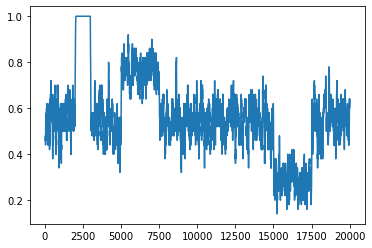

In [106]:
plt.plot(data['y'].rolling(window=50).mean())

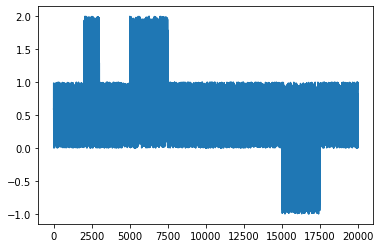

In [29]:
plt.plot(data['x1'])

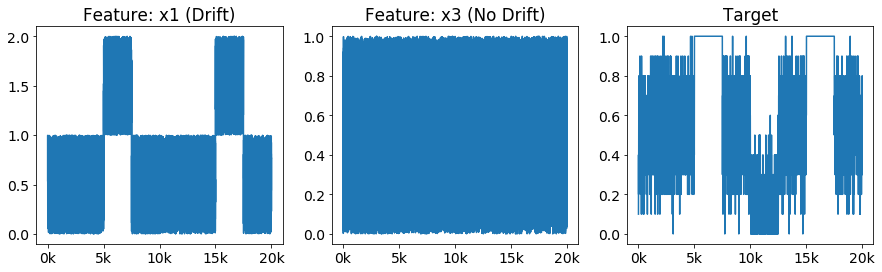

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)
fig, ax = plt.subplots(1, 3, figsize=(15,4))


ax[0].plot(data['x1'])
ax[0].set_title('Feature: x1 (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[1].plot(data['x3'])
ax[1].set_title('Feature: x3 (No Drift)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[2].plot(data['y'].rolling(10).mean())
ax[2].set_title('Target')
ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('sine_abrupt.png', bbox_inches='tight', dpi=300)